# Data Extraction from Image using OCR - pytesseract

In [1]:
import cv2                       # OpenCV: used for image processing (e.g., read, transform, display images)
# import PIL                      # Python Imaging Library (via Pillow): for loading and working with images
import pandas as pd             # For data manipulation and analysis (not used in the visible code yet)
import numpy as np              # For numerical operations on arrays/matrices
import pytesseract              # Wrapper for Google's Tesseract-OCR Engine (for extracting text from images)
import matplotlib.pyplot as plt # For plotting images/graphs
import matplotlib.image as mpimg
# %matplotlib inline              # Jupyter-specific command to display plots inline
import os                       # For interacting with the file system
import time                     # For timing operations or delays


In [17]:
# img_cv = cv2.imread('C:/Users/pooja/Pooja Ingale/Projects/Data Extraction/adhaar front.jpg')               # Load image in BGR format
# img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)        # Convert from BGR to RGB
# # print(f"Size of the original image : {img_cv.shape[1]} x {img_cv.shape[0]}")
# # print(f"Aspect ratio of original image : {img_cv.shape[1] / img_cv.shape[0]}")
# # plt.title("Original")
# # plt.imshow(img_cv)                                      # Show the image using matplotlib





Size of the original image : 1048 x 598
Aspect ratio of original image : 1.7525083612040133


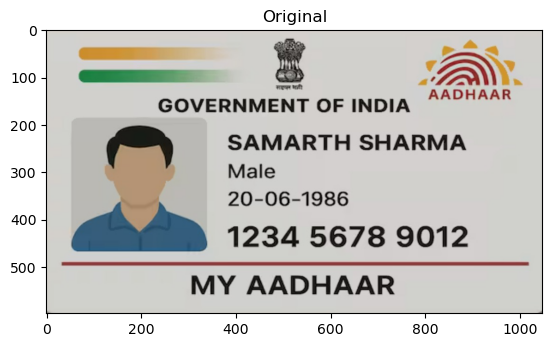

In [10]:
img_cv = mpimg.imread('C:/Users/pooja/Pooja Ingale/Projects/Data Extraction/Dummy_Aadhaar.jpg')
print(f"Size of the original image : {img_cv.shape[1]} x {img_cv.shape[0]}")
print(f"Aspect ratio of original image : {img_cv.shape[1] / img_cv.shape[0]}")
plt.title("Original")
plt.imshow(img_cv)

In [11]:
text_cv = pytesseract.image_to_string(img_cv)


In [12]:
print(text_cv)


a ——
L 4 \J
— ah I-NN.
GOVERNMENT OF INDIA ““°"**

SAMARTH SHARMA
Male
20-06-1986

1234 5678 9012
MY AADHAAR




# Using RE to find entities

In [13]:
import re

# # Step 1: Clean common OCR noise
# cleaned_text = text_cv.encode("ascii", errors="ignore").decode()  # remove non-ASCII characters
# cleaned_text = re.sub(r'[^\w\s:/]', '', cleaned_text)  # remove unwanted punctuation except colon and slash
# cleaned_text = re.sub(r'\n+', '\n', cleaned_text)  # collapse multiple newlines
# cleaned_text = cleaned_text.strip()

# print("🧹 Cleaned Text:\n", cleaned_text)

# Step 2: Extract entities using regex

# Extract Aadhaar number (4-digit groups)
aadhaar_match = re.search(r'(\d{4}\s\d{4}\s\d{4})', text_cv)

# Extract DOB (in format dd/mm/yyyy)
dob_match = re.search(r'DOB[:\s]*([0-9]{2}/[0-9]{2}/[0-9]{4})', text_cv)

# Extract gender
gender_match = re.search(r'\b(Female|Male|Other)\b', text_cv, re.IGNORECASE)

# Extract name: assume first line with 2–3 words after OCR noise is removed
lines = text_cv.split('\n')
name = None
for line in lines:
    if re.match(r'^[A-Z][a-z]+(?:\s[A-Z][a-z]+){1,2}$', line):
        name = line
        break

# Step 3: Display extracted entities
print("Extracted Entities:")
print(f"Name: {name}")
print(f"Date of Birth: {dob_match.group(1) if dob_match else 'Not found'}")
print(f"Gender: {gender_match.group(1).capitalize() if gender_match else 'Not found'}")
print(f"Aadhaar Number: {aadhaar_match.group(1) if aadhaar_match else 'Not found'}")


Extracted Entities:
Name: None
Date of Birth: Not found
Gender: Male
Aadhaar Number: 1234 5678 9012
